
# 📘 Module 20: AdaBoost (Adaptive Boosting) – Practice Notebook

This is a **full practice notebook with detailed guidance and TODO blocks**.


## 0. Notebook Setup

We start by importing all required libraries.  


In [ ]:
# TODO: Import all required libraries (Done for you)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#import logistic regression
from sklearn.linear_model import LogisticRegression
#import svm
from sklearn.svm import SVC

#breast cancer dataset
from sklearn.datasets import load_breast_cancer

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Feature Names: ['mean radius' 'mean texture'] ... and 28 more
Dataset Shape: (569, 30)


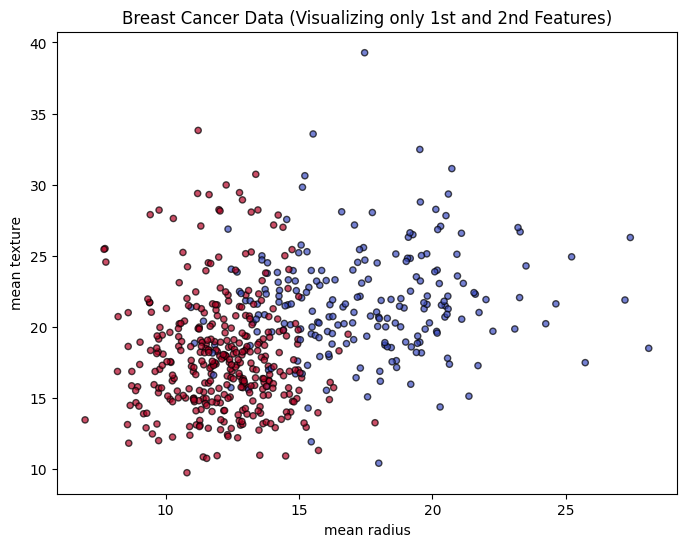

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

# Print info so you understand what you are working with
print("Feature Names:", data.feature_names[:2], "... and 28 more")
print(f"Dataset Shape: {X.shape}")
# You will see (569, 30). 569 patients, 30 measurements each.

# --- VISUALIZATION ---
# Since X has 30 columns, we pick column 0 and column 1 just for the plot.
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20, edgecolors='k', alpha=0.7)

# We use the actual feature names for the labels
plt.xlabel(data.feature_names[0]) # mean radius
plt.ylabel(data.feature_names[1]) # mean texture
plt.title("Breast Cancer Data (Visualizing only 1st and 2nd Features)")
plt.show()


## 1. Understanding the Dataset

You can begin with a **synthetic binary classification dataset**. or with any exisiting dataset.

Focus questions:
- Are the classes easily separable?
- Will a weak learner struggle?


In [ ]:
# # TODO: Generate a binary classification dataset
# # Hint:
# # - n_samples around 500
# # - n_features = 2
# # - class_sep > 1
# X,y = make_classification(
#     n_samples = 500,
#     n_features = 2,
#     n_redundant = 0,
#     n_informative = 2,
#     random_state = 42,
#     n_clusters_per_class = 1
# )

# #load breast cancer dataset
# # X,y = load_breast_cancer

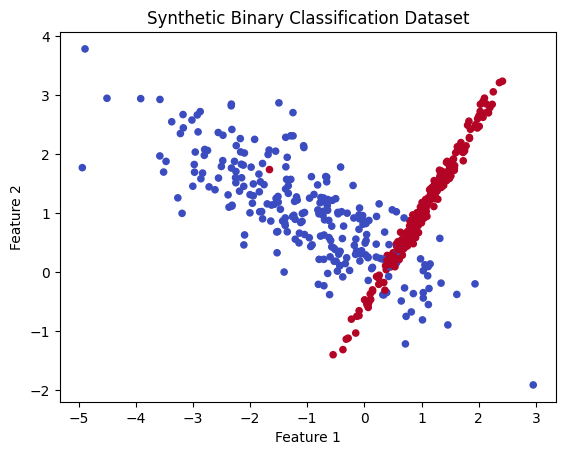

In [ ]:
# # TODO: Visualize the dataset using a scatter plot
# # Color points by class label

# # plt.scatter(...)
# # plt.show()
# plt.scatter(X[:,1],X[:,0],c=y,cmap='coolwarm',s=20)
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.title("Synthetic Binary Classification Dataset")
# plt.show()


## 2. Train–Test Split

Before any model training, we split the data.

Why?
- To evaluate generalization
- To avoid lying to ourselves

Standard split:
- 70% training
- 30% testing


In [ ]:
# TODO: Split the dataset into training and testing sets
# Use test_size=0.3 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


(398, 30) (171, 30)
(398,) (171,)



## 3. Baseline Weak Learner (Decision Stump)

Before AdaBoost, we test **one weak learner alone**.

We intentionally restrict the model:
- max_depth = 1
- This is called a **decision stump**

Expectation:
- Accuracy will not be impressive
- That is the point


In [ ]:
# TODO: Create a DecisionTreeClassifier with max_depth=1
# SVM, Logistic Regression
# This is our weak learner
weak_learner= DecisionTreeClassifier(max_depth=1,random_state=42)

#Fit the weak learner to the data
weak_learner.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=1, random_state=42)

In [ ]:
# TODO: Train the weak learner
# TODO: Predict on test data
# TODO: Calculate and print accuracy
y_pred_weak= weak_learner.predict(X_test)
weak_learner_acc = accuracy_score(y_test, y_pred_weak)
print(f"Weak Learner Accuracy: {weak_learner_acc:.4f}")

Weak Learner Accuracy: 0.8947



## 4. AdaBoost Classifier – Core Practice

Now we combine **many weak learners** using AdaBoost.

Key idea:
- Each learner focuses more on previous mistakes
- Misclassified samples get more attention
- Correctly classified samples slowly matter less


In [ ]:
# TODO: Initialize AdaBoostClassifier
# Use:
# - base_estimator = decision stump
# - n_estimators = 50
# - learning_rate = 1.0
ada_clf = AdaBoostClassifier(
    estimator=weak_learner,    # Use 'base_estimator=clf_stump' if you are on an old version of sklearn
    n_estimators=50,        # We will train 50 sequential stumps
    learning_rate=1.0,      # Each model gets full weight (standard starting point)
    random_state=42,

)
# TODO: Initialize AdaBoostClassifier
# Use:
# - base_estimator = decision stump
# - n_estimators = 50
# - learning_rate = 1.0

In [ ]:
# TODO: Train AdaBoost on training data
# TODO: Predict on test data
# TODO: Evaluate accuracy
# TODO: Print classification report

ada_clf.fit(X_train,y_train)
y_pred_ada = ada_clf.predict(X)
ada_acc = accuracy_score(y, y_pred_ada)

print(f"AdaBoost Accuracy (50 Stumps): {ada_acc:.4f}")

print("Classification: " ,classification_report(y, y_pred_ada))

AdaBoost Accuracy (50 Stumps): 0.9912
Classification:                precision    recall  f1-score   support

           0       0.99      0.99      0.99       212
           1       0.99      0.99      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569




## 5. Weak Learner vs AdaBoost Comparison

Now we compare:
- One weak learner
- Many weak learners working together

Expectation:
- AdaBoost should outperform a single stump
- If not, something is wrong


In [ ]:
# TODO: Create a comparison table
# Columns:
# - Model
# - Accuracy
comparison_data = {
    'Model': ['Single Decision Stump (Weak Learner)', 'AdaBoost (Ensemble)'],
    'Accuracy': [weak_learner_acc, ada_acc]
}
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

if ada_acc > weak_learner_acc:
    improvement = (ada_acc - weak_learner_acc) * 100
    print(f"CONCLUSION: AdaBoost outperformed the weak learner by {improvement:.2f}%")
    print("The ensemble strategy worked!")
else:
    print("CONCLUSION: Something is wrong. AdaBoost should be better.")
    print("Check if the learning rate is too low or n_estimators is too small.")

                                  Model  Accuracy
0  Single Decision Stump (Weak Learner)  0.894737
1                   AdaBoost (Ensemble)  0.991213
CONCLUSION: AdaBoost outperformed the weak learner by 9.65%
The ensemble strategy worked!



## 6. Effect of Number of Estimators

AdaBoost performance depends heavily on:
- Number of estimators

More is not always better.

Your job:
- Experiment
- Observe
- Plot


In [ ]:
# TODO: Try different n_estimators values
# Example: [5, 10, 20, 50, 100]

from sklearn.metrics import accuracy_score # Re-import to ensure it's the function

n_estimators_list = [1, 5, 10, 20, 50, 100, 200]
n_estimator_accuracy_scores = []



# Store accuracy for each value
weak_learner = DecisionTreeClassifier(max_depth=1, random_state=42)
for n_estimators_val in n_estimators_list:
    n_estimators_model = AdaBoostClassifier(
        estimator=weak_learner,
        n_estimators=n_estimators_val,
        learning_rate=1.0,
        random_state=42
    )
    n_estimators_model.fit(X_train, y_train)
    y_pred = n_estimators_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    n_estimator_accuracy_scores.append(acc)
    print(f"n_estimators={n_estimators_val}: Accuracy={acc:.4f}")

n_estimators=1: Accuracy=0.8600
n_estimators=5: Accuracy=0.8600
n_estimators=10: Accuracy=0.8600
n_estimators=20: Accuracy=0.8600
n_estimators=50: Accuracy=0.8600
n_estimators=100: Accuracy=0.8800
n_estimators=200: Accuracy=0.8400


In [ ]:
# Find the index of the maximum accuracy
max_accuracy_index = n_estimator_accuracy_scores.index(max(n_estimator_accuracy_scores))

# Get the n_estimators value corresponding to the maximum accuracy
best_n_estimator = n_estimators_list[max_accuracy_index]

print(f"The best number of estimator (n_estimators) is: {best_n_estimator}")
print(f"With an accuracy of: {max(n_estimator_accuracy_scores):.4f}")


The best number of estimators (n_estimators) is: 100
With an accuracy of: 0.8800


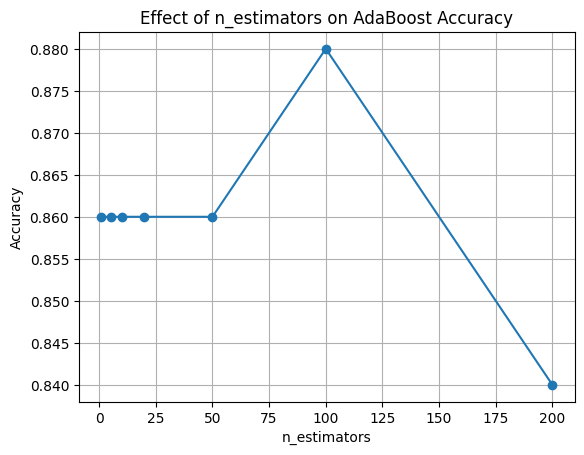

In [ ]:
# TODO: Plot n_estimators vs accuracy
# Label axes clearly
plt.plot(n_estimators_list, n_estimator_accuracy_scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators on AdaBoost Accuracy')
plt.grid(True)
plt.show()


## 7. Effect of Learning Rate

Learning rate controls **how aggressively** AdaBoost updates sample weights.

Intuition:
- High learning rate → fast but risky
- Low learning rate → slow but stable

You will verify this experimentally.


In [ ]:
# TODO: Experiment with different learning_rate values
# Example: [0.01, 0.1, 0.5, 1.0]
learning_rate_list = [0.01, 0.1, 0.5, 1.0]
learning_rate_accuracy_scores = []

for learning_rate_val in learning_rate_list:
  learning_rate_model = AdaBoostClassifier(
      estimator=weak_learner,
      n_estimators=best_n_estimator,
      learning_rate=learning_rate_val,
      random_state=42
  )
  learning_rate_model.fit(X_train, y_train)
  y_pred = learning_rate_model .predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  learning_rate_accuracy_scores.append(acc)
  print(f"learning_rate={learning_rate_val}: Accuracy={acc:.4f}")



learning_rate=0.01: Accuracy=0.8600
learning_rate=0.1: Accuracy=0.8467
learning_rate=0.5: Accuracy=0.8467
learning_rate=1.0: Accuracy=0.8800


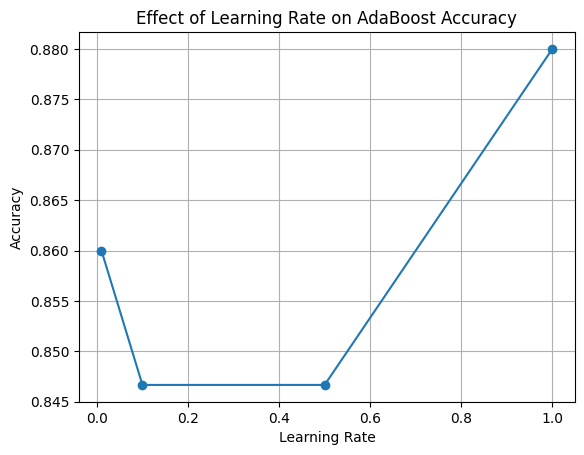

In [ ]:
# TODO: Plot learning_rate vs accuracy

plt.plot(learning_rate_list, learning_rate_accuracy_scores, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate on AdaBoost Accuracy')
plt.grid(True)


## 8. Feature Importance in AdaBoost

AdaBoost can tell us:
- Which features were more influential

This depends on:
- How often a feature is used in splits
- How strong the corresponding learners were


In [ ]:
# TODO: Extract feature importance from AdaBoost
# TODO: Plot feature importance

# Re-initialize and re-fit AdaBoostClassifier to ensure it's correctly fitted
# with the best parameters identified previously.
# 'weak_learner' and 'best_n_estimator' are available from previous cells.
ada_clf_for_importance = AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=best_n_estimator,
    learning_rate=1.0, # Using the default or best learning rate if optimized
    random_state=42
)
ada_clf_for_importance.fit(X_train, y_train)

importances = ada_clf_for_importance.feature_importances_

feature_names = [f"Feature {i+1}" for i in range(len(importances))] # Replace with your feature names

feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_imp_df)

     Feature  Importance
1  Feature 2    0.636405
0  Feature 1    0.363595



## 9. Reflection (Mandatory)

Answer in your own words.

1. Why is AdaBoost called *adaptive*?
2. What happens to misclassified samples after each iteration?
3. Why do we prefer weak learners instead of strong ones?
4. When should AdaBoost not be used?



## 10. Bonus Challenge (Optional)

Replace the decision stump with **Logistic Regression** as the base estimator.

Questions:
- Does AdaBoost still work?
- Should you do this in practice?
- Why or why not?


In [ ]:
# TODO: Replace DecisionTreeClassifier with LogisticRegression or SVM
# Train AdaBoost again
# Compare performance

weak_learner_logreg = LogisticRegression(random_state=42)

ada_clf_logreg = AdaBoostClassifier(
    estimator=weak_learner_logreg,
    n_estimators=best_n_estimator,
    learning_rate=1.0,
    random_state=42
)
ada_clf_logreg.fit(X_train, y_train)
y_pred_ada_logreg = ada_clf_logreg.predict(X_test)
ada_acc_logreg = accuracy_score(y_test, y_pred_ada_logreg)

print(f"AdaBoost (Logistic Regression) Accuracy: {ada_acc_logreg:.4f}")


AdaBoost (Logistic Regression) Accuracy: 0.8600


In [ ]:
#comparison table Logistic Regression vs AdaBosst

comparison_data_logreg = {
    'Model': ['Single Decision Stump (Weak Learner)', 'AdaBoost (Logistic Regression)'],
    'Accuracy': [weak_learner_acc, ada_acc_logreg]
}
comparison_df_logreg = pd.DataFrame(comparison_data_logreg)
print(comparison_df_logreg)

if ada_acc_logreg > weak_learner_acc:
    improvement_logreg = (ada_acc_logreg - weak_learner_acc) * 100
    print(f"CONCLUSION: AdaBoost (Logistic Regression) outperformed the weak learner by {improvement_logreg:.2f}%")
else:
    print("CONCLUSION: Something is wrong. AdaBoost (Logistic Regression) should be better.")
    print("Check if the learning rate is too low or n_estimators is too small.")

                                  Model  Accuracy
0  Single Decision Stump (Weak Learner)      0.86
1        AdaBoost (Logistic Regression)      0.86
CONCLUSION: Something is wrong. AdaBoost (Logistic Regression) should be better.
Check if the learning rate is too low or n_estimators is too small.


In [ ]:
weak_learner_svm = SVC(random_state=42)

ada_clf_svm = AdaBoostClassifier(
    estimator=weak_learner_svm,
    n_estimators=best_n_estimator,
    learning_rate=1.0,
    random_state=42
)

ada_clf_svm.fit(X_train, y_train)
y_pred_ada_svm = ada_clf_svm.predict(X_test)
ada_acc_svm = accuracy_score(y_test, y_pred_ada_svm)

print(f"AdaBoost (SVM) Accuracy: {ada_acc_svm:.4f}")


AdaBoost (SVM) Accuracy: 0.5000


In [ ]:
comparison_data_svm = {
    'Model': ['Single Decision Stump (Weak Learner)', 'AdaBoost (SVM)'],
    'Accuracy': [weak_learner_acc, ada_acc_svm]
}
comparison_df_svm = pd.DataFrame(comparison_data_svm)
print(comparison_df_svm)

if ada_acc_svm > weak_learner_acc:
    improvement_svm = (ada_acc_svm - weak_learner_acc) * 100
    print(f"CONCLUSION: AdaBoost (SVM) outperformed the weak learner by {improvement_svm:.2f}%")
else:
    print("CONCLUSION: Something is wrong. AdaBoost (SVM) should be better.")

                                  Model  Accuracy
0  Single Decision Stump (Weak Learner)      0.86
1                        AdaBoost (SVM)      0.50
CONCLUSION: Something is wrong. AdaBoost (SVM) should be better.
